In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#lenghth of the dataframe
len(df)

8807

In [ ]:
df.shape

(8807, 12)

In [ ]:
#check all columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#check the unique values in each columns
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
#check the null values in each columns
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#check the duplicate values in each columns
df.duplicated().sum()

0

In [ ]:
#seperating the show_id and director
dir=df[['show_id', 'director']]
dir.head()

In [ ]:
#spliting the director columns
dir['director'].str.contains(',')
dir['director']=dir['director'].str.split(',')
dir['director'].head()

In [ ]:
dir=dir.explode('director')
dir.rename({'director':'Directors'}, axis=1,inplace=True)
dir['Directors'] = dir['Directors'].str.replace(r'^\s+', '', regex=True)

In [ ]:
len(dir)

9612

In [ ]:
#seperating the show_id and cast
actor=df[['show_id', 'cast']]
actor['cast'].str.contains(',')
actor['cast']=actor['cast'].str.split(',')
actor['cast'].head()
actor=actor.explode('cast')
len(actor)
actor=pd.DataFrame(actor.reset_index())
actor.drop('index',axis=1,inplace=True)
actor.rename({'cast':'Actors'}, axis=1,inplace=True)
actor['Actors'] = actor['Actors'].str.replace(r'^\s+', '', regex=True)
actor.tail()

In [ ]:
#seperating the show_id and country
country=df[['show_id', 'country']]
country.rename({'country':'Countries'}, axis=1,inplace=True)
country['Countries'].str.contains(',')
country['Countries']=country['Countries'].str.split(',')
country=country.explode('Countries')
country=pd.DataFrame(country.reset_index())
country.drop('index',axis=1,inplace=True)
len(country)
country.tail()
country['Countries'] = country['Countries'].str.replace(r'^\s+', '', regex=True)

In [ ]:
df['listed_in'].unique()

In [ ]:
#seperating the show_id and country
genre=df[['show_id', 'listed_in']]
genre.rename({'listed_in':'Genre'}, axis=1,inplace=True)
genre['Genre'].str.contains(',')
genre['Genre']=genre['Genre'].str.split(',')
genre=genre.explode('Genre')
len(genre)
genre=pd.DataFrame(genre.reset_index())
genre.drop('index',axis=1,inplace=True)
genre['Genre'] = genre['Genre'].str.replace(r'^\s+', '', regex=True)
genre.tail()

In [ ]:
#Mergeing Directors DF with Actual DF to create director colunm with single director name
Merge_1 = pd.merge(dir,actor,on='show_id', how="inner")
Merge_1.head()

In [ ]:
Merge_2 = pd.merge(Merge_1,country,on='show_id', how="inner")
Merge_2.head()

In [ ]:
Merge_3 = pd.merge(Merge_2,genre,on='show_id', how="inner")
Merge_3.head()

,show_id,Directors,Actors,Countries,Genre
0,s1,Kirsten Johnson,NaN,United States,Documentaries
1,s2,NaN,Ama Qamata,South Africa,International TV Shows
2,s2,NaN,Ama Qamata,South Africa,TV Dramas
3,s2,NaN,Ama Qamata,South Africa,TV Mysteries
4,s2,NaN,Khosi Ngema,South Africa,International TV Shows


In [ ]:
Merge_3.isna().sum()

In [ ]:
df_fin = pd.merge(Merge_3,df[['show_id', 'type', 'title', 'date_added',
      'release_year', 'rating', 'duration','description']],on='show_id', how="left")
df_fin.head()

,show_id,Directors,Actors,Countries,Genre,type,title,date_added,release_year,rating,duration,description
0,s1,Kirsten Johnson,NaN,United States,Documentaries,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,s2,NaN,Ama Qamata,South Africa,International TV Shows,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,s2,NaN,Ama Qamata,South Africa,TV Dramas,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,s2,NaN,Ama Qamata,South Africa,TV Mysteries,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,s2,NaN,Khosi Ngema,South Africa,International TV Shows,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df_fin.head()

,show_id,Directors,Actors,Countries,Genre,type,title,date_added,release_year,rating,duration,description
0,s1,Kirsten Johnson,NaN,United States,Documentaries,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,s2,NaN,Ama Qamata,South Africa,International TV Shows,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,s2,NaN,Ama Qamata,South Africa,TV Dramas,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,s2,NaN,Ama Qamata,South Africa,TV Mysteries,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,s2,NaN,Khosi Ngema,South Africa,International TV Shows,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df_fin.isna().sum()

show_id             0
Directors       50643
Actors           2149
Countries       11897
Genre               0
type                0
title               0
date_added        158
release_year        0
rating             67
duration            3
description         0
dtype: int64

In [ ]:
df_fin.loc[df_fin['duration'].isna()]

,show_id,Directors,Actors,Countries,Genre,type,title,date_added,release_year,rating,duration,description
126582,s5542,Louis C.K.,Louis C.K.,United States,Movies,Movie,Louis C.K. 2017,"April 4, 2017",2017,74 min,NaN,"Louis C.K. muses on religion, eternal love, gi..."
131648,s5795,Louis C.K.,Louis C.K.,United States,Movies,Movie,Louis C.K.: Hilarious,"September 16, 2016",2010,84 min,NaN,Emmy-winning comedy writer Louis C.K. brings h...
131782,s5814,Louis C.K.,Louis C.K.,United States,Movies,Movie,Louis C.K.: Live at the Comedy Store,"August 15, 2016",2015,66 min,NaN,The comic puts his trademark hilarious/thought...


In [ ]:
#imputing the null values in duration columns with coresponding rarting values
df_fin.loc[df_fin['duration'].isna(), "duration"]=df_fin.loc[df_fin['duration'].isna(), "duration"].fillna(df_fin['rating'])



In [ ]:
#replacing rating values with approprate rating values,since it has minutes value which is irrevalent to rating
#df['rating'].unique()
df_fin.loc[df_fin['rating'].str.contains("min", na=False),'rating']='NR'
df_fin['rating'].fillna('NR',inplace=True)

In [ ]:
#imputing date_added null values with mode of date_added for that particular release_year
for i in df_fin[df_fin['date_added'].isnull()]['release_year'].unique():
  imp_date=df_fin[df_fin['release_year']==i]['date_added'].mode().values[0]
  df_fin.loc[df_fin['release_year']==i,'date_added']=df_fin.loc[df_fin['release_year']==i,'date_added'].fillna(imp_date)

In [ ]:
df_fin.groupby(['Countries']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]


when analysing the above countries result ,We can see duplicates in countries column,so we need to correct the duplicates(ex: United States are present twice and France is present twice)

In [ ]:
#impute null Countries colunm with coressponding directors's country mode
for i in df_fin[df_fin['Countries'].isna()]['Directors'].unique():
  if i in df_fin[~df_fin['Countries'].isna()]['Directors'].unique():
    imp_coun = df_fin[df_fin['Directors']==i]['Countries'].mode().values[0]
    df_fin.loc[df_fin['Directors']==i,'Countries']=df_fin.loc[df_fin['Directors']==i,'Countries'].fillna(imp_coun)


In [ ]:
#impute remaining null Countries colunm with coressponding Actors's country mode
for i in df_fin[df_fin['Countries'].isna()]['Actors'].unique():
  if i in df_fin[~df_fin['Countries'].isna()]['Actors'].unique():
    imp_coun = df_fin[df_fin['Actors']==i]['Countries'].mode().values[0]
    df_fin.loc[df_fin['Actors']==i,'Countries']=df_fin.loc[df_fin['Actors']==i,'Countries'].fillna(imp_coun)

In [ ]:
#impute remaining null Countries colunm with 'Unknown Country'
df_fin['Countries'].fillna('Unknown Country',inplace=True)

In [ ]:
#impute null Directors colunm with coressponding Countries's Directors mode
#for i in df_fin[df_fin['Directors'].isna()]['Countries'].unique():
#  if i in df_fin[~df_fin['Directors'].isna()]['Countries'].unique():
#   imp_dir = df_fin[df_fin['Countries']==i]['Directors'].mode().values[0]
#    df_fin.loc[df_fin['Countries']==i,'Directors']=df_fin.loc[df_fin['Countries']==i,'Directors'].fillna(imp_dir)

In [ ]:
#impute remaining null Directors colunm with 'Unknown Director'
df_fin['Directors'].fillna('Unknown Director',inplace=True)

In [ ]:
#impute null Directors colunm with coressponding Countries's Directors mode
#for i in df_fin[df_fin['Actors'].isna()]['Countries'].unique():
#  if i in df_fin[~df_fin['Actors'].isna()]['Countries'].unique():
#    imp_act = df_fin[df_fin['Countries']==i]['Actors'].mode().values[0]
#    df_fin.loc[df_fin['Countries']==i,'Actors']=df_fin.loc[df_fin['Countries']==i,'Actors'].fillna(imp_act)

In [ ]:
#impute remaining null Actors colunm with 'Unknown Actor'
df_fin['Actors'].fillna('Unknown Actor',inplace=True)

In [ ]:
df_fin.isna().sum()

show_id         0
Directors       0
Actors          0
Countries       0
Genre           0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
description     0
dtype: int64

In [ ]:
#convert date_added to date format
df_fin['date_added'] = pd.to_datetime(df_fin['date_added'])

In [ ]:
#taking a deep copy of Dataframe
df_fincopy=df_fin.copy()

In [ ]:
df_fin['duration']=df_fin['duration'].str.replace(" min","")

In [ ]:
df_fin['duration_copy']=df_fin['duration']

In [ ]:
#converting all duration into integers
#df_fin['duration_copy']=df_fin['duration_copy'].str.replace(" min","")
df_fin.loc[df_fin['duration_copy'].str.contains("Season",na=False),'duration_copy']=0
df_fin['duration_copy']=df_fin['duration_copy'].astype('int')
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 202064
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   show_id        202065 non-null  object        
 1   Directors      202065 non-null  object        
 2   Actors         202065 non-null  object        
 3   Countries      202065 non-null  object        
 4   Genre          202065 non-null  object        
 5   type           202065 non-null  object        
 6   title          202065 non-null  object        
 7   date_added     202065 non-null  datetime64[ns]
 8   release_year   202065 non-null  int64         
 9   rating         202065 non-null  object        
 10  duration       202065 non-null  object        
 11  description    202065 non-null  object        
 12  duration_copy  202065 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 29.6+ MB


In [ ]:
df_fin['duration_copy'].describe()

count    202065.000000
mean         77.152065
std          52.262613
min           0.000000
25%           0.000000
50%          95.000000
75%         112.000000
max         312.000000
Name: duration_copy, dtype: float64

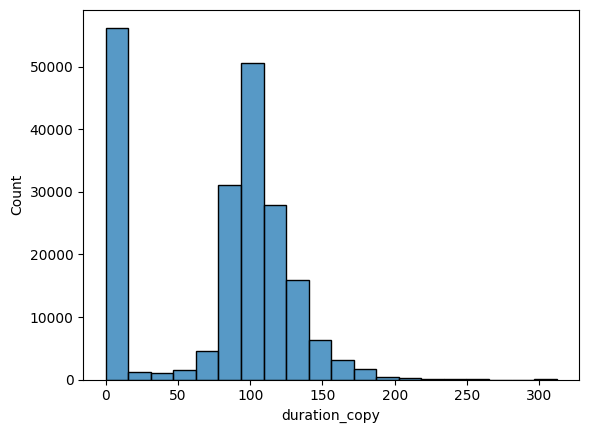

In [ ]:
import seaborn as sns
sns.histplot(data=df_fin, x= "duration_copy", bins=20)
plt.show()

In [ ]:
#category the duration of movies and TV shows
dur_bins=[-1,1,50,80,100,120,150,200,320]
dur_lables = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-320']
df_fin['duration_copy'] = pd.cut(df_fin['duration_copy'], bins=dur_bins, labels = dur_lables)

In [ ]:
df_fin.loc[~df_fin['duration'].str.contains('Season'),'duration']=df_fin.loc[~df_fin['duration'].str.contains('Season'),'duration_copy']
df_fin.head()

,show_id,Directors,Actors,Countries,Genre,type,title,date_added,release_year,rating,duration,description,duration_copy
0,s1,Kirsten Johnson,Unknown Actor,United States,Documentaries,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,80-100,"As her father nears the end of his life, filmm...",80-100
1,s2,Unknown Director,Ama Qamata,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",<1
2,s2,Unknown Director,Ama Qamata,South Africa,TV Dramas,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",<1
3,s2,Unknown Director,Ama Qamata,South Africa,TV Mysteries,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",<1
4,s2,Unknown Director,Khosi Ngema,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",<1


In [ ]:
df_fin['duration'].value_counts()

In [ ]:
#analysing the date_added in different columns
df_fin['Month_added']=df_fin['date_added'].dt.month
df_fin['Year_added']=df_fin['date_added'].dt.year
df_fin['Day_added']=df_fin['date_added'].dt.strftime('%d')
df_fin.head()

,show_id,Directors,Actors,Countries,Genre,type,title,date_added,release_year,rating,duration,description,duration_copy,Month_added,Year_added,Day_added
0,s1,Kirsten Johnson,Unknown Actor,United States,Documentaries,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,80-100,"As her father nears the end of his life, filmm...",80-100,9,2021,25
1,s2,Unknown Director,Ama Qamata,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",<1,9,2021,24
2,s2,Unknown Director,Ama Qamata,South Africa,TV Dramas,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",<1,9,2021,24
3,s2,Unknown Director,Ama Qamata,South Africa,TV Mysteries,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",<1,9,2021,24
4,s2,Unknown Director,Khosi Ngema,South Africa,International TV Shows,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",<1,9,2021,24


In [ ]:
df_fin.drop(['description'],axis=1,inplace=True)

# Univariate analysis of all attributes

In [ ]:
df_genre=df_fin.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_genre

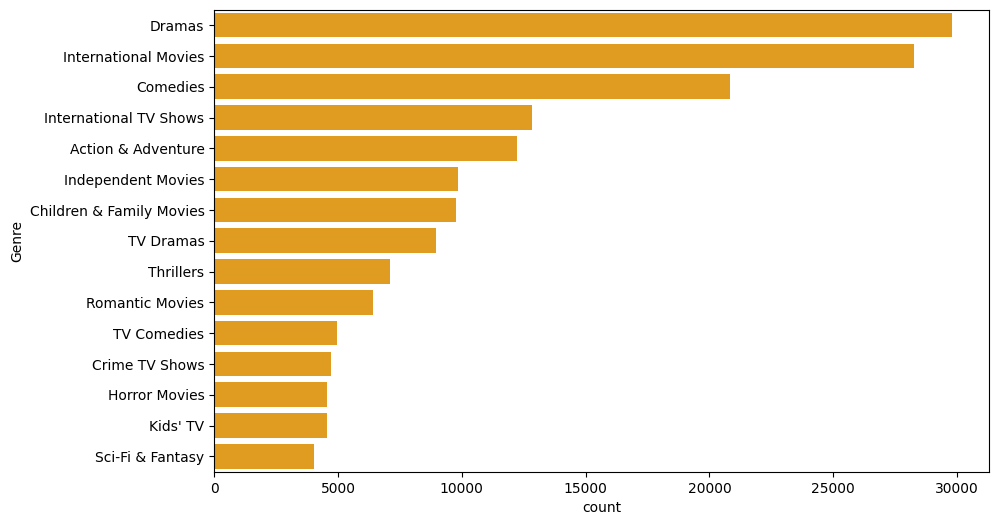

In [ ]:
#check the count of genre
plt.figure(figsize=(10,6))
sns.countplot(y='Genre',data=df_fin,order=pd.value_counts(df_fin['Genre']).iloc[:15].index,color='orange')
plt.show()

From the avbove graph Dramas,International Movies, and Comedies are the most popular from the above graph

In [ ]:
df_fin['release_year'].describe()

count    202065.000000
mean       2013.448950
std           9.013616
min        1925.000000
25%        2012.000000
50%        2016.000000
75%        2019.000000
max        2021.000000
Name: release_year, dtype: float64

#Movies vs TV shows

In [ ]:
df_type=df_fin.groupby(['type']).agg({'title':'nunique'}).reset_index()
df_type

,type,title
0,Movie,6131
1,TV Show,2676


<Axes: xlabel='type', ylabel='title'>

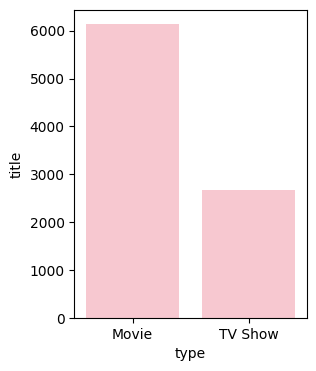

In [ ]:
plt.figure(figsize=(3,4))
sns.barplot(data=df_type, x='type', y='title',color='pink',width=0.8)

*From the above graph,2/3 of the data is having movies and 1/3 of the data is TV shows*

In [ ]:
#TV shows data analysis over years
df_TVshows_all=df_fin[df_fin['type']=='TV Show']
df_movies_all=df_fin[df_fin['type']=='Movie']

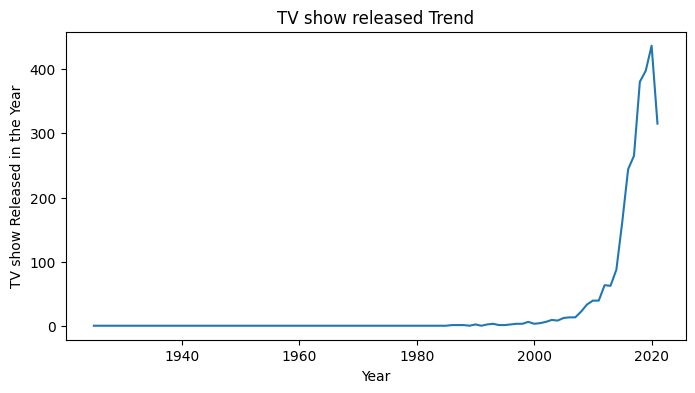

In [ ]:
#TV shows
df_TV_year=df_TVshows_all.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(8,4))
sns.lineplot(data=df_TV_year, x='release_year', y='title')
plt.title('TV show released Trend')
plt.ylabel("TV show Released in the Year")
plt.xlabel("Year")
plt.show()

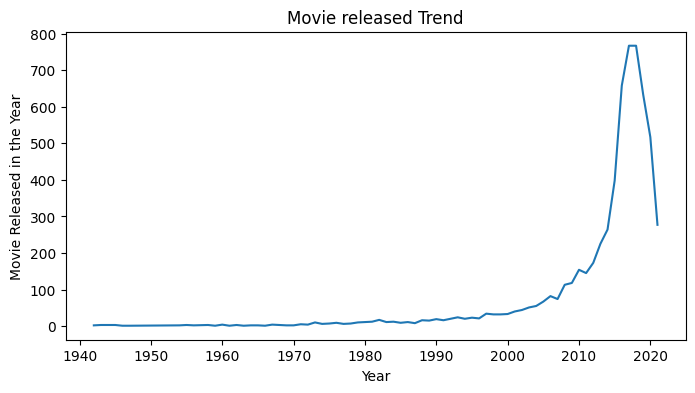

In [ ]:
#Movies over years
df_movie_year=df_movies_all.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(8,4))
sns.lineplot(data=df_movie_year, x='release_year', y='title')
plt.title('Movie released Trend')
plt.ylabel("Movie Released in the Year")
plt.xlabel("Year")
plt.show()

*From the above graph there is a continous increase in both TV shows and Movies from 1980 and went peak at 2019,but after 2019 there is fall down in count of TV shows release.*

#Best time to release TV shows

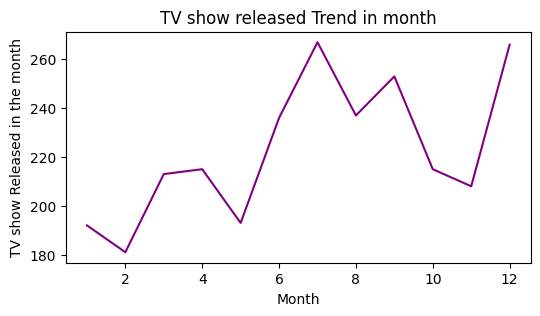

In [ ]:

df_TV_month=df_TVshows_all.groupby(['Month_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(6,3))
sns.lineplot(data=df_TV_month, x='Month_added', y='title',color='purple')
plt.title('TV show released Trend in month')
plt.ylabel("TV show Released in the month")
plt.xlabel("Month")
plt.show()

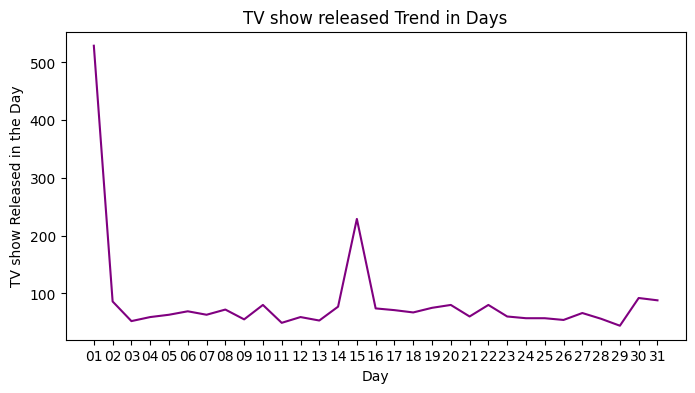

In [ ]:
df_TV_day=df_TVshows_all.groupby(['Day_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(8,4))
sns.lineplot(data=df_TV_day, x='Day_added', y='title',color='purple')
plt.title('TV show released Trend in Days')
plt.ylabel("TV show Released in the Day")
plt.xlabel("Day")
plt.show()

*From the above 2 line graphs,the best time to release TV shows is in middle of the year or end of the year.And also especally at either each month starting or middle of the month.*

#Best time to release Movies

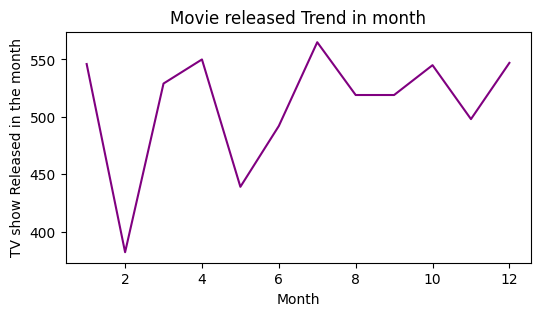

In [ ]:
#Best time to release Movies
df_movie_month=df_movies_all.groupby(['Month_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(6,3))
sns.lineplot(data=df_movie_month, x='Month_added', y='title',color='purple')
plt.title('Movie released Trend in month')
plt.ylabel("TV show Released in the month")
plt.xlabel("Month")
plt.show()

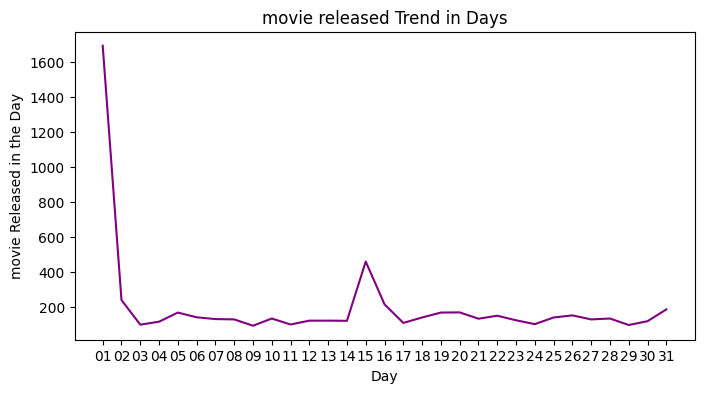

In [ ]:
df_movie_day=df_movies_all.groupby(['Day_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(8,4))
sns.lineplot(data=df_movie_day, x='Day_added', y='title',color='purple')
plt.title('movie released Trend in Days')
plt.ylabel("movie Released in the Day")
plt.xlabel("Day")
plt.show()

*From the above 2 line graphs,the best time to release movies 4th,7th,12th month of the year.And also especally at either each month starting or middle of the month.*

In [ ]:
df_fin.corr()

<ipython-input-53-5024b300d709>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_fin.corr()


,release_year,Month_added,Year_added
release_year,1.000000,-0.032395,0.052764
Month_added,-0.032395,1.000000,-0.166901
Year_added,0.052764,-0.166901,1.000000


<ipython-input-54-0d09a19ee617>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_fin.corr(), cmap= "Blues", annot=True)


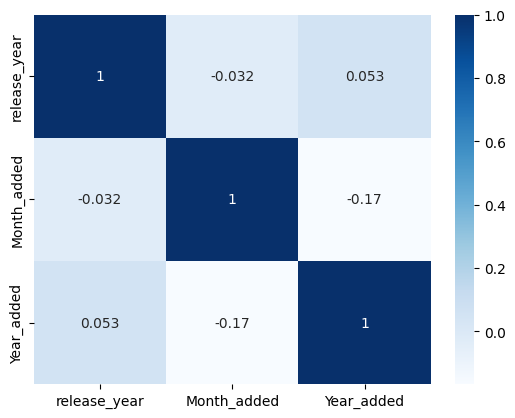

In [ ]:
sns.heatmap(df_fin.corr(), cmap= "Blues", annot=True)
plt.show()

Here the Month added and release year are week correlation.
Month added and Year_added are week negativly corelated.

In [ ]:
#number of distinct titles on the basis of rating
df_fin.groupby(['rating']).agg({"title":"nunique"})[:4]

,title
rating,
G,41
NC-17,3
NR,87
PG,287


In [ ]:
df_rating=df_fin.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(10,6))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

TV-MA,TV-14,TV-PG are the most number of ratings.
TV-MA Mature audiance only
TV_14-Parental Guidelines signifies content with parents strongly cautioned
TV-PG- suitable for all ages

In [ ]:
#number of distinct titles on the basis of duration
df_fin.groupby(['duration']).agg({"title":"nunique"})

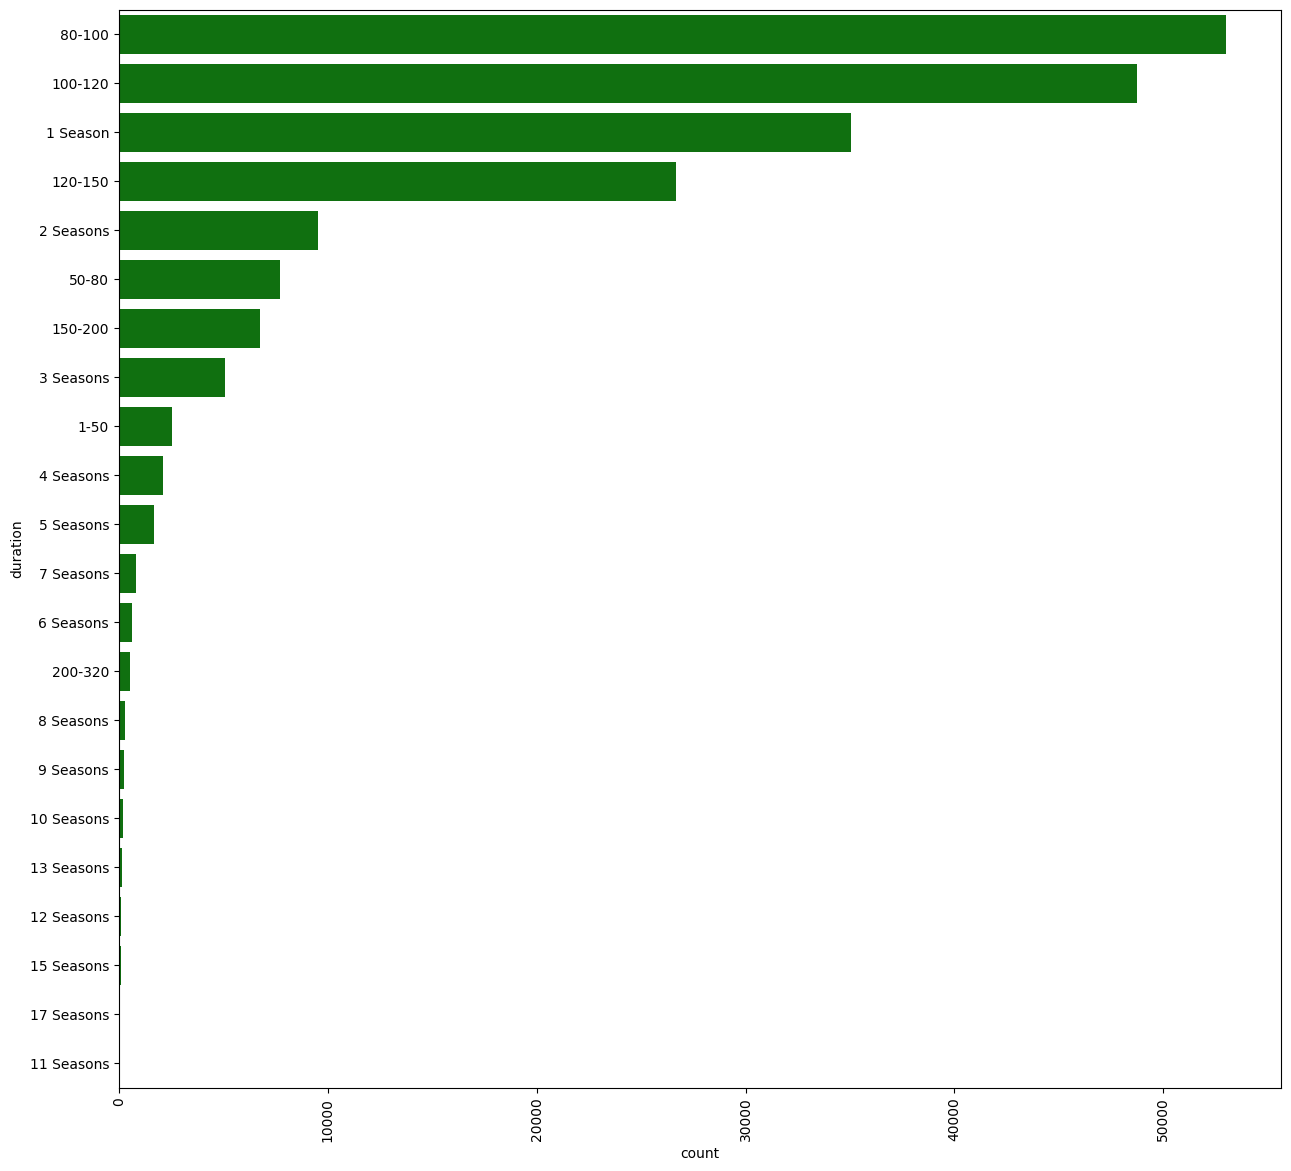

In [ ]:
plt.figure(figsize=(15,14))
sns.countplot(data=df_fin, y='duration',order = df_fin['duration'].value_counts().index,color='green')
plt.xticks(rotation=90)
plt.show()

Most popular duration is 80-100 and 100-120 for movies and TV shows with one season*

In [ ]:
#Top Actors in netflix with distinct title counts
Top_30_Actors=df_fin.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
Top_30_Actors=Top_30_Actors[Top_30_Actors['Actors']!='Unknown Actor']
Top_30_Actors.head()

,Actors,title
2832,Anupam Kher,43
30489,Shah Rukh Khan,35
16697,Julie Tejwani,33
24215,Naseeruddin Shah,32
32591,Takahiro Sakurai,32


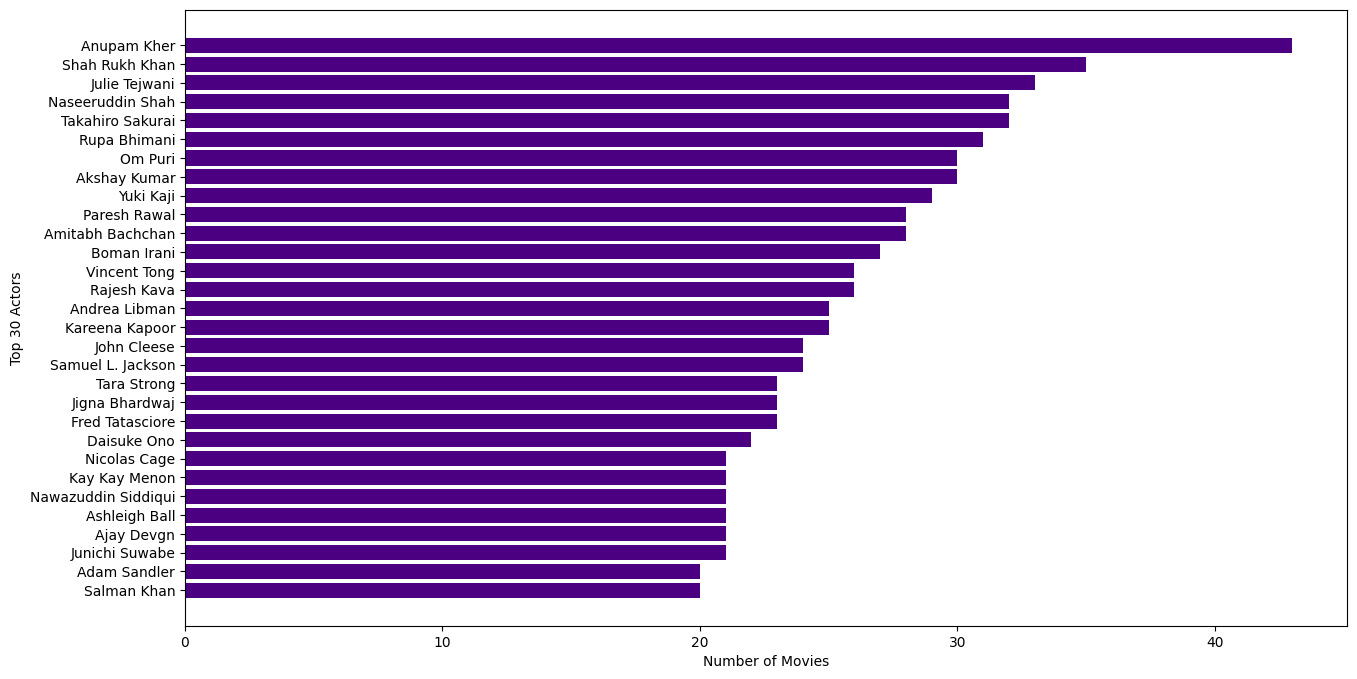

In [ ]:
Top_30_Actors=df_fin.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
Top_30_Actors=Top_30_Actors[Top_30_Actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(Top_30_Actors[::-1]['Actors'], Top_30_Actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Top 30 Actors')
plt.show()

Popular Actors 'Anupam Kher', 'Shah Rukh Khan', 'Julie Tejwani',
       'Naseeruddin Shah', 'Takahiro Sakurai', 'Rupa Bhimani', 'Om Puri',
       'Akshay Kumar', 'Yuki Kaji', 'Paresh Rawal', 'Amitabh Bachchan',
       'Boman Irani', 'Vincent Tong', 'Rajesh Kava', 'Andrea Libman',
       'Kareena Kapoor', 'John Cleese', 'Samuel L. Jackson',
       'Tara Strong', 'Jigna Bhardwaj', 'Fred Tatasciore', 'Daisuke Ono',
       'Nicolas Cage', 'Kay Kay Menon', 'Nawazuddin Siddiqui',
       'Ashleigh Ball', 'Ajay Devgn', 'Junichi Suwabe', 'Adam Sandler',
       'Salman Khan'

# Top Directors in netflix

In [ ]:
#Top Actors in netflix with distinct title counts
Top_30_Directors=df_fin.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
Top_30_Directors=Top_30_Directors[Top_30_Directors['Directors']!='Unknown Director']
Top_30_Directors

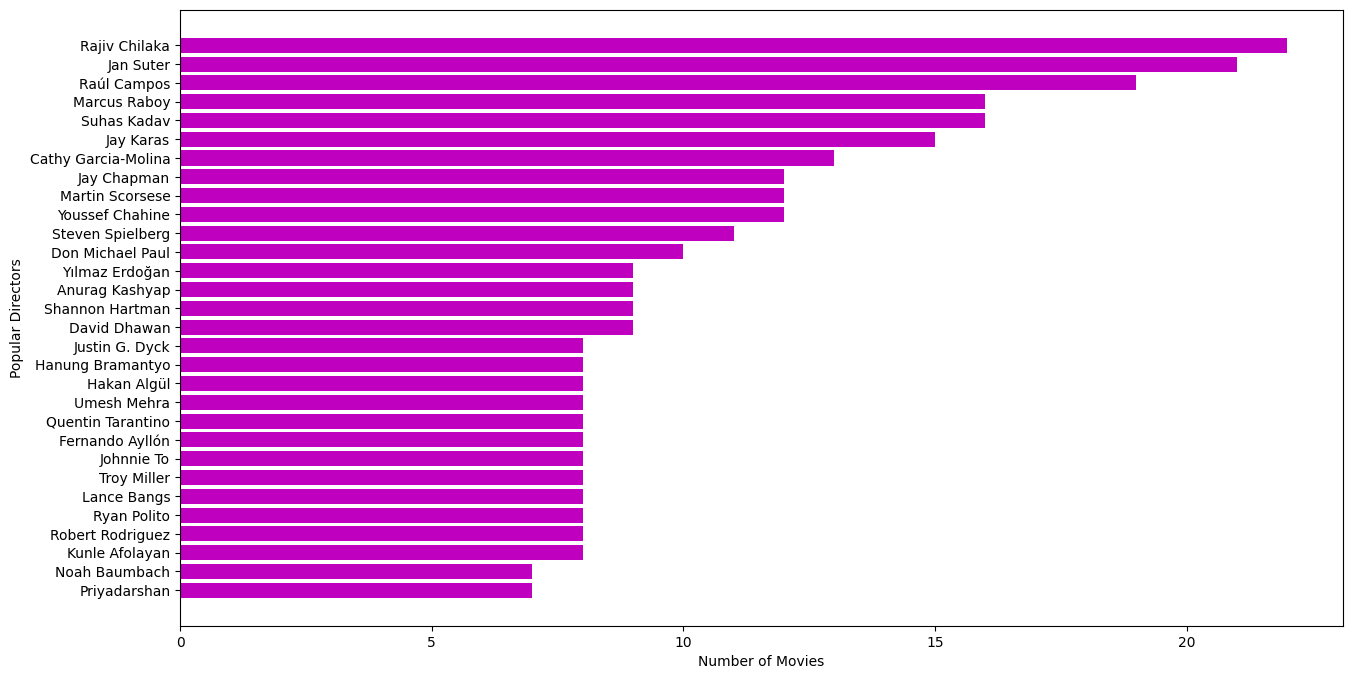

In [ ]:
Top_30_Directors=df_fin.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
Top_30_Directors=Top_30_Directors[Top_30_Directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(Top_30_Directors[::-1]['Directors'], Top_30_Directors[::-1]['title'],color=['m'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

# Top Countries were Netflix Movies are popular

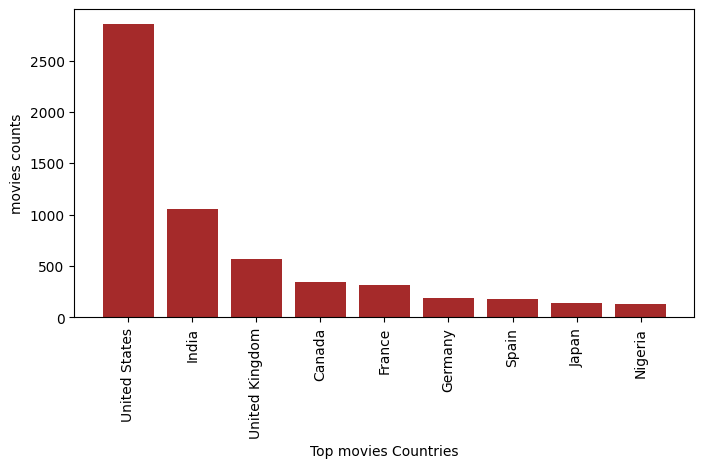

In [ ]:
Top_10__movies_countries=df_movies_all.groupby(['Countries']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
Top_10__movies_countries=Top_10__movies_countries[Top_10__movies_countries['Countries']!='Unknown Country']
plt.figure(figsize=(8,4))
plt.bar(Top_10__movies_countries['Countries'], Top_10__movies_countries['title'],color=['brown'])
plt.xlabel('Top movies Countries')
plt.ylabel('movies counts')
plt.xticks(rotation=90)
plt.show()

*From the above data United States,India,United Kingdom are the popular countries for Netflix Movies.So we will further dive into these 3 countries and the analysis the data.*

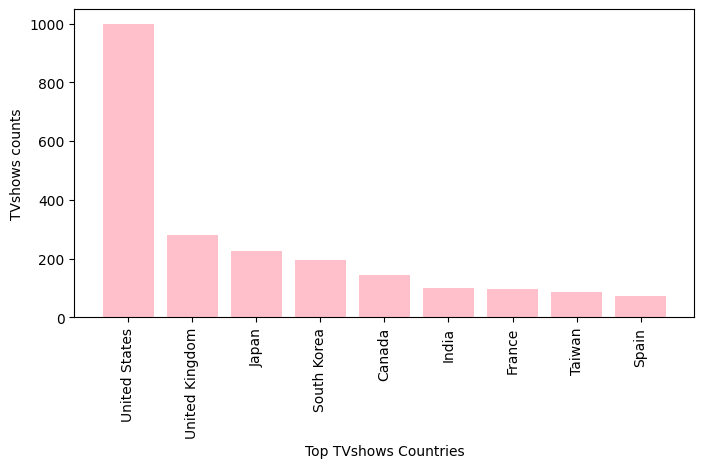

In [ ]:
Top_10__TVshows_countries=df_TVshows_all.groupby(['Countries']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
Top_10__TVshows_countries=Top_10__TVshows_countries[Top_10__TVshows_countries['Countries']!='Unknown Country']
plt.figure(figsize=(8,4))
plt.bar(Top_10__TVshows_countries['Countries'], Top_10__TVshows_countries['title'],color=['pink'])
plt.xlabel('Top TVshows Countries')
plt.ylabel('TVshows counts')
plt.xticks(rotation=90)
plt.show()

From the above data United States,United Kingdom,Japan are the popular countries for Netflix TV shows.So we will further dive into these 3 countries and the analysis the data.

# United State : Analysis
seperate Movie and TVshows data frames


In [ ]:
df_USA_movies=df_fin[df_fin['Countries']=='United States'][df_fin[df_fin['Countries']=='United States']['type']=='Movie']
df_USA_TVshows=df_fin[df_fin['Countries']=='United States'][df_fin[df_fin['Countries']=='United States']['type']=='TV Show']

In [ ]:
df_fin['Genre'].unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

Popular Genre in USA

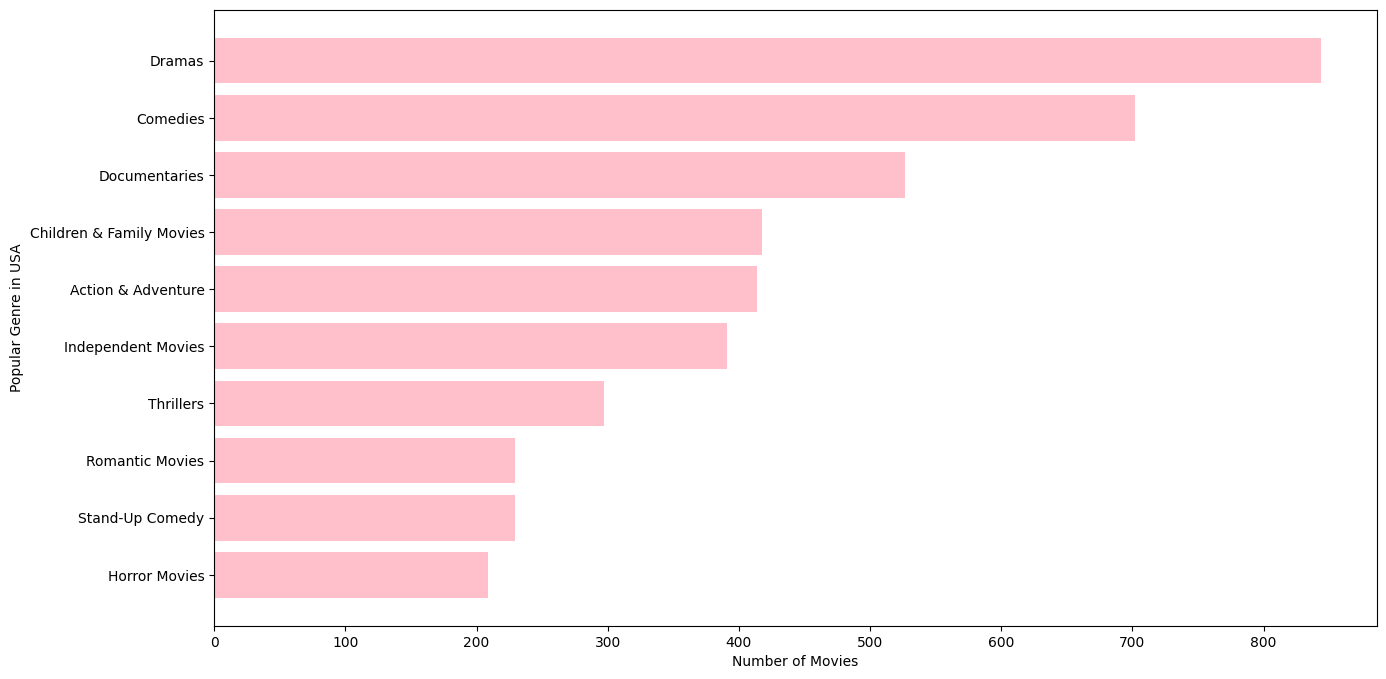

In [ ]:
Top_10__USA_mov_genre=df_USA_movies.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(Top_10__USA_mov_genre[::-1]['Genre'], Top_10__USA_mov_genre[::-1]['title'],color=['pink'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Genre in USA')
plt.show()

Dramas,Comedies,Documentries are the popular Genre in USA for movies

Top Directors in countplot

<ipython-input-66-c9b059eee1a9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Directors',data=df_USA_movies1.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False).head(10),palette='bone')


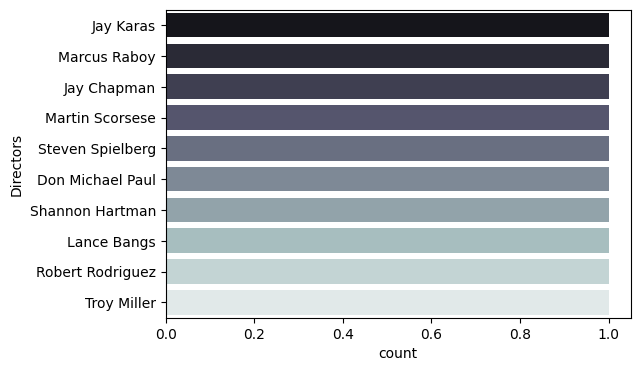

In [ ]:
plt.figure(figsize=(6,4))
##sns.countplot(y='Directors',data=df_USA_movies,order=pd.value_counts(df_USA_movies['Directors'])[:10].index,palette='bone')
df_USA_movies1=df_USA_movies[df_USA_movies['Directors']!='Unknown Director']
sns.countplot(y='Directors',data=df_USA_movies1.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False).head(10),palette='bone')
plt.show()

In [ ]:
Top_10__USA_mov_directors=df_USA_movies.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
Top_10__USA_mov_directors=Top_10__USA_mov_directors[Top_10__USA_mov_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(Top_10__USA_mov_directors[::-1]['Directors'], Top_10__USA_mov_directors[::-1]['title'],color=['salmon'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors in USA')
plt.show()

Marcus Raboy,Jay Karas,Jay Chapman are the popular movie directors in USA*



Top Actors in USA for movies

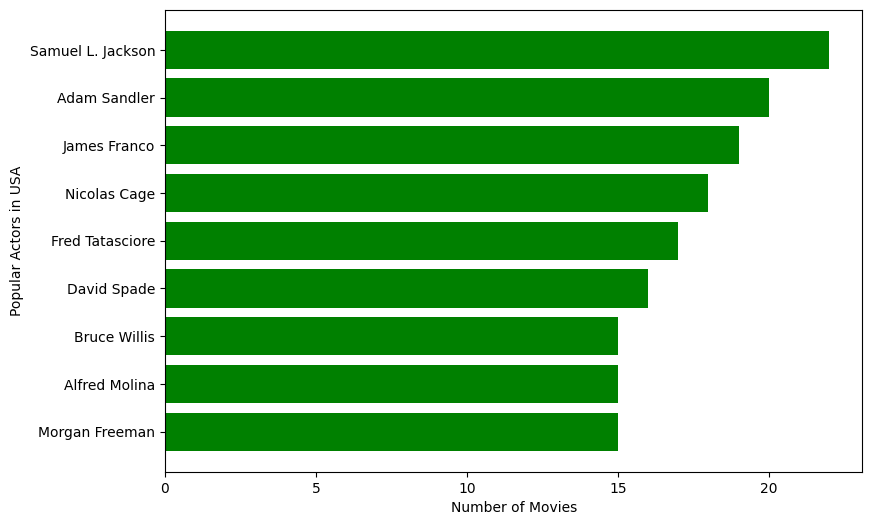

In [ ]:
Top_10__USA_mov_actors=df_USA_movies.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
Top_10__USA_mov_actors=Top_10__USA_mov_actors[Top_10__USA_mov_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(9,6))
plt.barh(Top_10__USA_mov_actors[::-1]['Actors'], Top_10__USA_mov_actors[::-1]['title'],color=['green'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors in USA')
plt.show()

Samuel L. Jackson,Adam Sandler,James Franco are the popular actors in USA,So we can produce more movies on these actors*

# Best director and actor combinations

In [ ]:
df_USA_movies['Actor & Director']=df_USA_movies['Actors'] + ' and ' + df_USA_movies['Directors']
df_usa_movies_copy=df_USA_movies[df_USA_movies['Actors']!='Unknown Actor']
df_usa_movies_copy=df_usa_movies_copy[df_usa_movies_copy['Directors']!='Unknown Director']
df_usa_movies_copy.head()

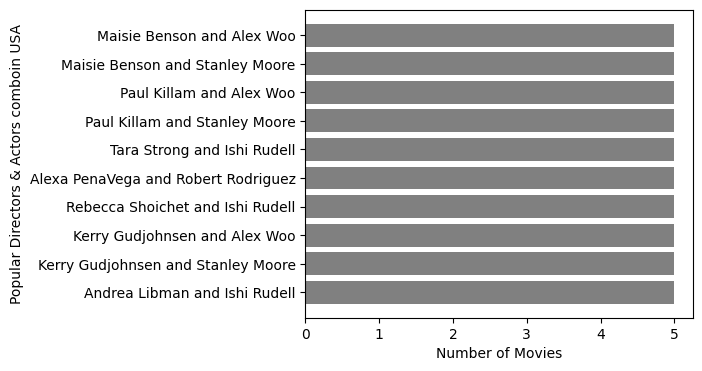

In [ ]:
Top_10_USA_mov_actdir=df_usa_movies_copy.groupby(['Actor & Director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(5,4))
plt.barh(Top_10_USA_mov_actdir[::-1][('Actor & Director')], Top_10_USA_mov_actdir[::-1]['title'],color=['grey'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors & Actors comboin USA')
plt.show()

Most popular Director and Actor Combo:
Maisie Benson and Alex Woo, Maisie Benson and Stanley Moore,
Paul Killam and Alex Woo, Paul Killam and Stanley Moore,
Tara Strong and Ishi Rudell,
Alexa PenaVega and Robert Rodriguez,
Rebecca Shoichet and Ishi Rudell,
Kerry Gudjohnsen and Alex Woo,
Kerry Gudjohnsen and Stanley Moore,
Andrea Libman and Ishi Rudell, Kevin Hart and Leslie Small,
Ashleigh Ball and Ishi Rudell,
Tabitha St. Germain and Ishi Rudell,
Hugo Weaving and Lana Wachowski, Andrea Libman and Steve Ball,
Hugo Weaving and Lilly Wachowski, Jason Mewes and Kevin Smith,
Robert De Niro and Martin Scorsese, Smith Foreman and Alex Woo,
Rory Markham and Mike Gunther

Popular Duration

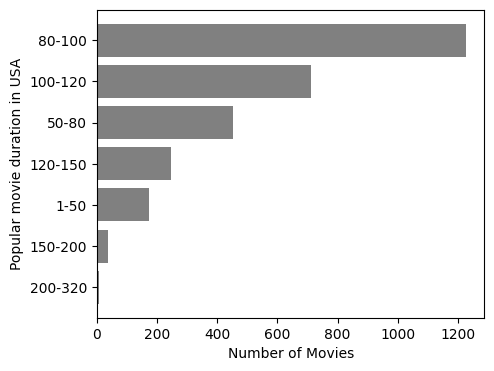

In [ ]:
Top_10_USA_mov_dura=df_USA_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(5,4))
plt.barh(Top_10_USA_mov_dura[::-1][('duration')], Top_10_USA_mov_dura[::-1]['title'],color=['grey'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular movie duration in USA')
plt.show()

80-100 Mins is the popular duaration of movies to watch.So viewers like small movies

popular Rating in movies in USA

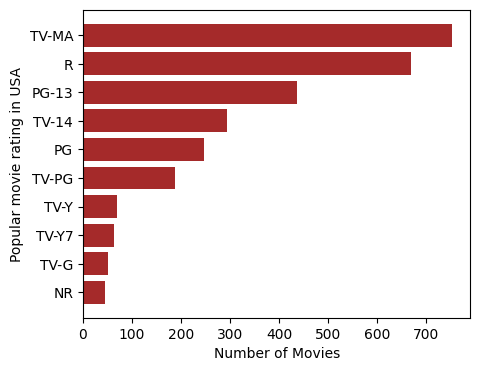

In [ ]:
Top_10_USA_mov_rating=df_USA_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(5,4))
plt.barh(Top_10_USA_mov_rating[::-1][('rating')], Top_10_USA_mov_rating[::-1]['title'],color=['brown'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular movie rating in USA')
plt.show()

In USA for movies TV-MA,R,PG-13 are the most number of ratings. TV-MA Mature audiance only,R-Restricted,
PG-13- parents strongly cautioned.

# #Movies release in USA

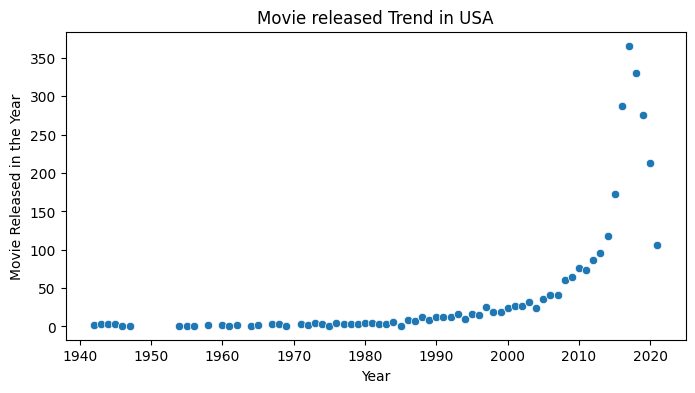

In [ ]:
#Movies release in USA
df_movie_year_USA=df_USA_movies.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(8,4))
sns.scatterplot(data=df_movie_year_USA, x='release_year', y='title')
plt.title('Movie released Trend in USA')
plt.ylabel("Movie Released in the Year")
plt.xlabel("Year")
plt.show()

Though there is gap in frequency of movie release,the count of movie release is increase after 2010 and got reduced after 2019 and 2020.There is a pandamic suitution at 2020,due to this we can see a fall in count

# Month Analysis of movie release

In [ ]:
df_movie_month_USA=df_USA_movies.groupby(['Month_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(6,3))
sns.lineplot(data=df_movie_month_USA, x='Month_added', y='title')
plt.title('Movie addeded in neflix USA')
plt.ylabel("Movie addeded in the month")
plt.xlabel("month")
plt.show()

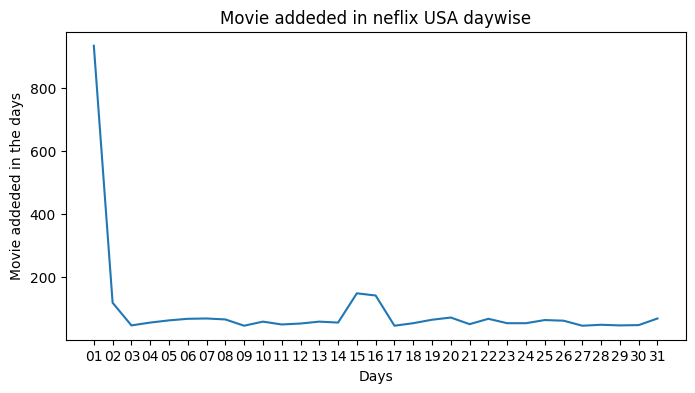

In [ ]:
df_movie_day_USA=df_USA_movies.groupby(['Day_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(8,4))
sns.lineplot(data=df_movie_day_USA, x='Day_added', y='title')
plt.title('Movie addeded in neflix USA daywise')
plt.ylabel("Movie addeded in the days")
plt.xlabel("Days")
plt.show()

From the above 2 line graphs,the best time to release movies 1st,7th,12th month of the year.And also especally at either each month starting or middle of the month.

# USA TVShows analysis

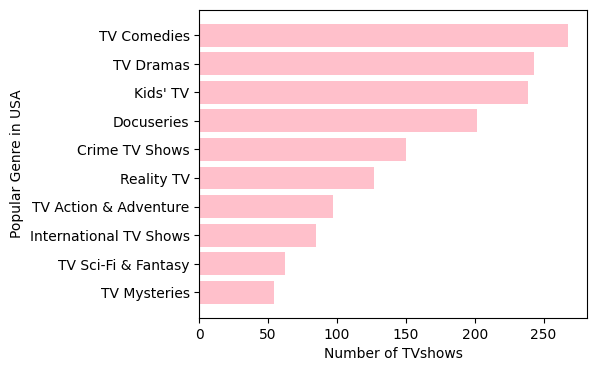

In [ ]:
Top_10__USA_TV_genre=df_USA_TVshows.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(5,4))
plt.barh(Top_10__USA_TV_genre[::-1]['Genre'], Top_10__USA_TV_genre[::-1]['title'],color=['pink'])
plt.xlabel('Number of TVshows')
plt.ylabel('Popular Genre in USA')
plt.show()

TV comdies,TV dramas,Kids TV are the popular genre in USA TV shows

Popular TV show Directors in USA

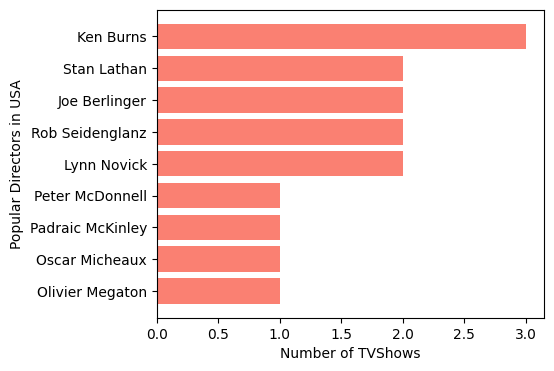

In [ ]:
Top_10__USA_TV_directors=df_USA_TVshows.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
Top_10__USA_TV_directors=Top_10__USA_TV_directors[Top_10__USA_TV_directors['Directors']!='Unknown Director']
plt.figure(figsize=(5,4))
plt.barh(Top_10__USA_TV_directors[::-1]['Directors'], Top_10__USA_TV_directors[::-1]['title'],color=['salmon'])
plt.xlabel('Number of TVShows')
plt.ylabel('Popular Directors in USA')
plt.show()

Ken Burns,Stan Lathan are popular directors across TV Shows on Netflix in USA

Top Actors in TV shows in USA

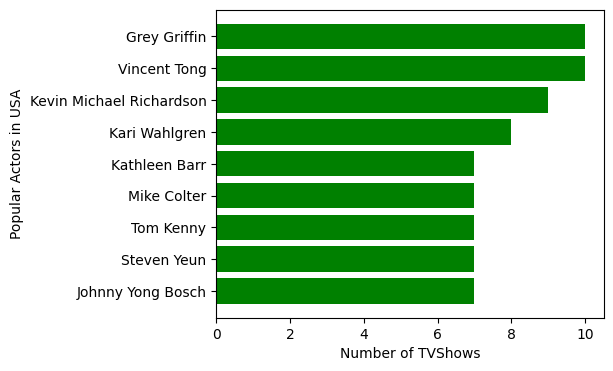

In [ ]:
Top_10__USA_TV_actors=df_USA_TVshows.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
Top_10__USA_TV_actors=Top_10__USA_TV_actors[Top_10__USA_TV_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(5,4))
plt.barh(Top_10__USA_TV_actors[::-1]['Actors'], Top_10__USA_TV_actors[::-1]['title'],color=['green'])
plt.xlabel('Number of TVShows')
plt.ylabel('Popular Actors in USA')
plt.show()

Grey Griffin,Vincent Tong ,Kevin Michael Richardson are the popular TV show actors.

Top Actor and Director Combo

In [ ]:
df_USA_TVshows['Actor & Director']=df_USA_TVshows['Actors'] + ' and ' + df_USA_TVshows['Directors']
df_USA_TVshows_copy=df_USA_TVshows[df_USA_TVshows['Actors']!='Unknown Actor']
df_USA_TVshows_copy=df_USA_TVshows_copy[df_USA_TVshows_copy['Directors']!='Unknown Director']
df_USA_TVshows_copy.head()

,show_id,Directors,Actors,Countries,Genre,type,title,date_added,release_year,rating,duration,duration_copy,Month_added,Year_added,Day_added,Actor & Director
111,s6,Mike Flanagan,Kate Siegel,United States,TV Dramas,TV Show,Midnight Mass,2021-09-24,2021,TV-MA,1 Season,<1,9,2021,24,Kate Siegel and Mike Flanagan
112,s6,Mike Flanagan,Kate Siegel,United States,TV Horror,TV Show,Midnight Mass,2021-09-24,2021,TV-MA,1 Season,<1,9,2021,24,Kate Siegel and Mike Flanagan
113,s6,Mike Flanagan,Kate Siegel,United States,TV Mysteries,TV Show,Midnight Mass,2021-09-24,2021,TV-MA,1 Season,<1,9,2021,24,Kate Siegel and Mike Flanagan
114,s6,Mike Flanagan,Zach Gilford,United States,TV Dramas,TV Show,Midnight Mass,2021-09-24,2021,TV-MA,1 Season,<1,9,2021,24,Zach Gilford and Mike Flanagan
115,s6,Mike Flanagan,Zach Gilford,United States,TV Horror,TV Show,Midnight Mass,2021-09-24,2021,TV-MA,1 Season,<1,9,2021,24,Zach Gilford and Mike Flanagan


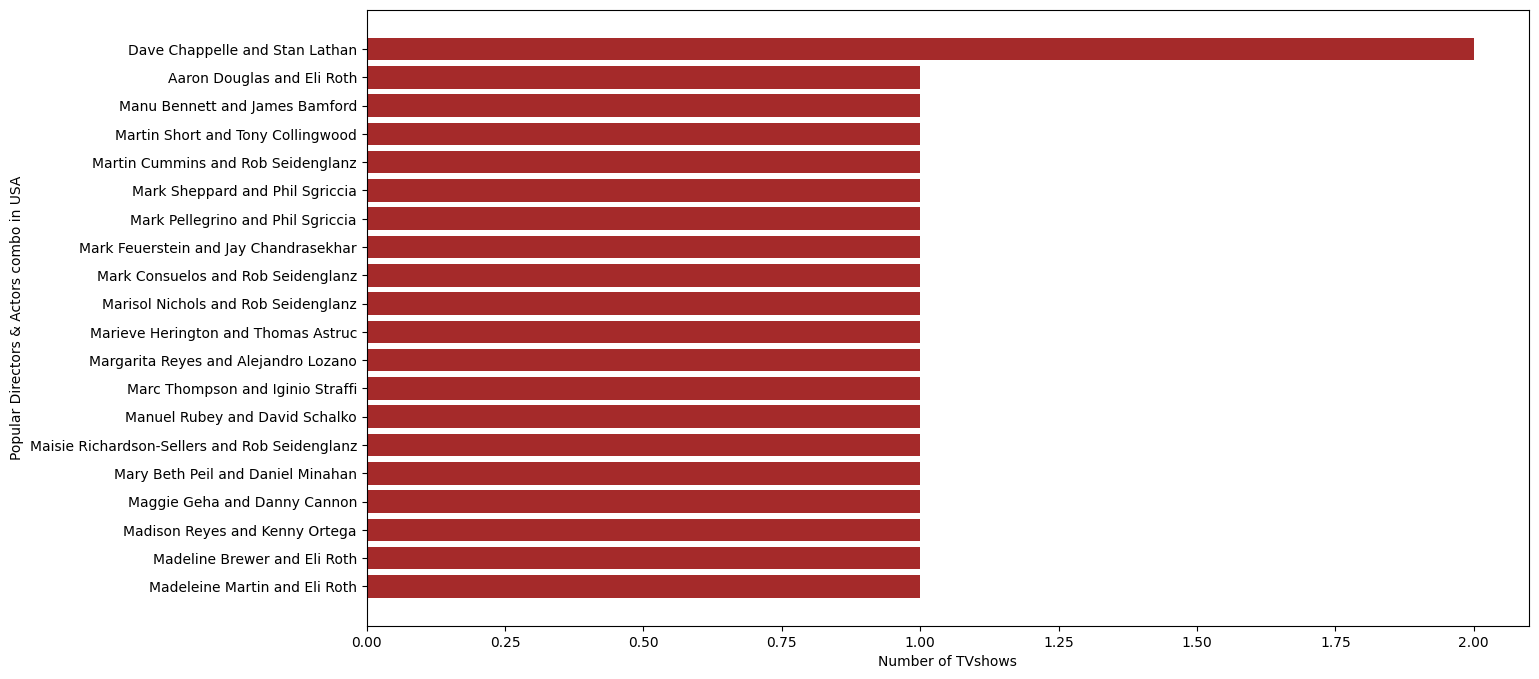

In [ ]:
Top_10_USA_TV_actdir=df_USA_TVshows_copy.groupby(['Actor & Director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:20]
plt.figure(figsize=(15,8))
plt.barh(Top_10_USA_TV_actdir[::-1][('Actor & Director')], Top_10_USA_TV_actdir[::-1]['title'],color=['brown'])
plt.xlabel('Number of TVshows')
plt.ylabel('Popular Directors & Actors combo in USA')
plt.show()

In [ ]:
#TVshows release in USA
df_TV_year_USA=df_USA_TVshows.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(6,3))
sns.lineplot(data=df_TV_year_USA, x='release_year', y='title')
plt.title('TVshows released Trend in USA')
plt.ylabel("TVshows Released in the Year")
plt.xlabel("Year")
plt.show()

Though there is gap in frequency of TVshows release,the count of TVshows release is increase after 2010 and got reduced after 2019 and 2020.There is a pandamic suitution at 2020,due to this we can see a fall in count



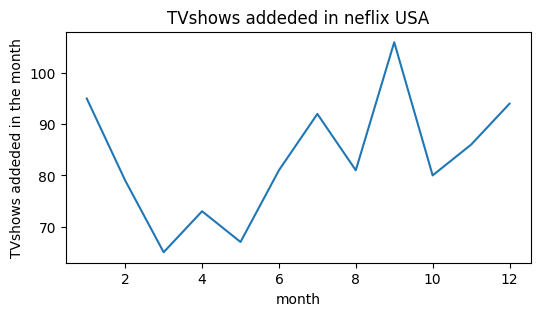

In [ ]:
df_TV_month_USA=df_USA_TVshows.groupby(['Month_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(6,3))
sns.lineplot(data=df_TV_month_USA, x='Month_added', y='title')
plt.title('TVshows addeded in neflix USA')
plt.ylabel("TVshows addeded in the month")
plt.xlabel("month")
plt.show()

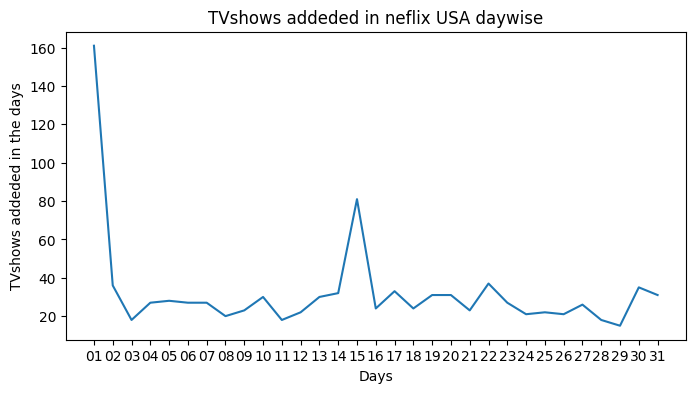

In [ ]:
df_TV_day_USA=df_USA_TVshows.groupby(['Day_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(8,4))
sns.lineplot(data=df_TV_day_USA, x='Day_added', y='title')
plt.title('TVshows addeded in neflix USA daywise')
plt.ylabel("TVshows addeded in the days")
plt.xlabel("Days")
plt.show()

From the above 2 line graphs,the best time to release movies 9th,1st,7th,12th month of the year.And also especally at either each month starting or middle of the month.

Popular TV shows duration

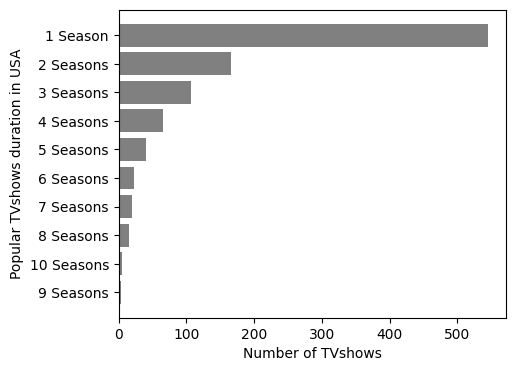

In [ ]:
Top_10_USA_TV_dura=df_USA_TVshows.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(5,4))
plt.barh(Top_10_USA_TV_dura[::-1][('duration')], Top_10_USA_TV_dura[::-1]['title'],color=['grey'])
plt.xlabel('Number of TVshows')
plt.ylabel('Popular TVshows duration in USA')
plt.show()

single season tv shows is the popular duaration of tvshows to watch.So viewers like small 1 season movies

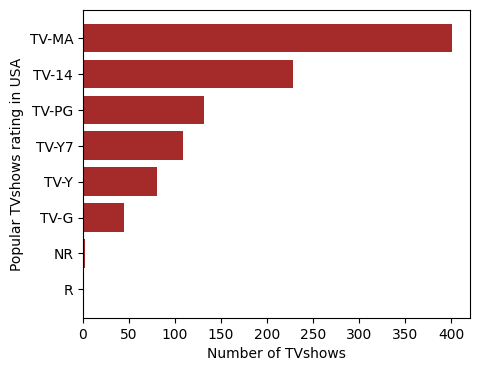

In [ ]:
Top_10_USA_TV_rating=df_USA_TVshows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(5,4))
plt.barh(Top_10_USA_TV_rating[::-1][('rating')], Top_10_USA_TV_rating[::-1]['title'],color=['brown'])
plt.xlabel('Number of TVshows')
plt.ylabel('Popular TVshows rating in USA')
plt.show()

TV-MA,TV-14,TV-PG are the most number of ratings. TV-MA Mature audiance only TV_14-Parental Guidelines signifies content with parents strongly cautioned TV-PG- suitable for all ages

# Indian Movies Analysis - 2nd place in Movie viewers

In [ ]:
df_india_movies=df_fin[df_fin['Countries']=='India'][df_fin[df_fin['Countries']=='India']['type']=='Movie']

popular Genre

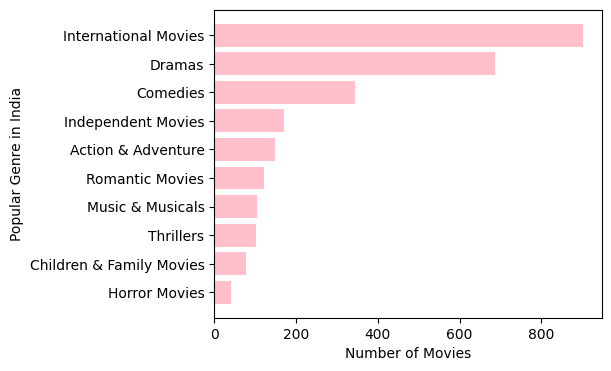

In [ ]:
Top_10_india_mov_genre=df_india_movies.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(5,4))
plt.barh(Top_10_india_mov_genre[::-1]['Genre'], Top_10_india_mov_genre[::-1]['title'],color=['pink'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Genre in India')
plt.show()

From the avbove graph International Movies,Dramas, and Comedies are the most popular from the above graph

Popular Director

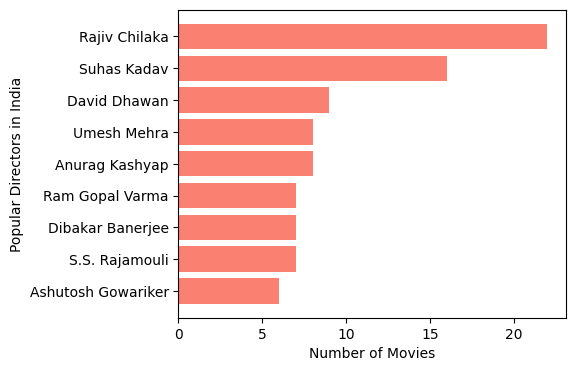

In [ ]:
Top_10_india_mov_directors=df_india_movies.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
Top_10_india_mov_directors=Top_10_india_mov_directors[Top_10_india_mov_directors['Directors']!='Unknown Director']
plt.figure(figsize=(5,4))
plt.barh(Top_10_india_mov_directors[::-1]['Directors'], Top_10_india_mov_directors[::-1]['title'],color=['salmon'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors in India')
plt.show()

Rajiv Chilaka', 'Suhas Kadav', 'David Dhawan' are the popular indian movie directors

popular Actors

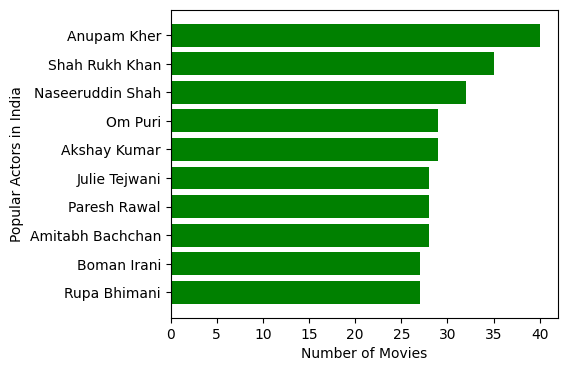

In [ ]:
Top_10_indian_mov_actors=df_india_movies.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
Top_10_indian_mov_actors=Top_10_indian_mov_actors[Top_10_indian_mov_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(5,4))
plt.barh(Top_10_indian_mov_actors[::-1]['Actors'], Top_10_indian_mov_actors[::-1]['title'],color=['green'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors in India')
plt.show()

'Anupam Kher', 'Shah Rukh Khan', 'Naseeruddin Shah' are the popular indian movie actors

Best director and actor combinations

In [ ]:
df_india_movies['Actor & Director']=df_india_movies['Actors'] + ' and ' + df_india_movies['Directors']
df_india_movies_copy=df_india_movies[df_india_movies['Actors']!='Unknown Actor']
df_india_movies_copy=df_india_movies_copy[df_india_movies_copy['Directors']!='Unknown Director']
df_india_movies_copy.head()

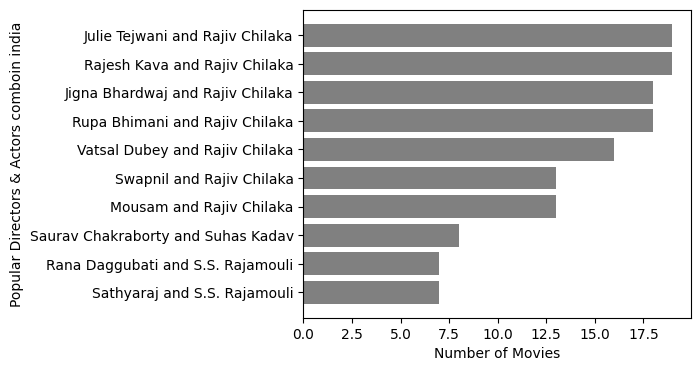

In [ ]:
Top_10_indian_mov_actdir=df_india_movies_copy.groupby(['Actor & Director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(5,4))
plt.barh(Top_10_indian_mov_actdir[::-1][('Actor & Director')], Top_10_indian_mov_actdir[::-1]['title'],color=['grey'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors & Actors comboin india')
plt.show()

'Julie Tejwani and Rajiv Chilaka', 'Rajesh Kava and Rajiv Chilaka',
       'Jigna Bhardwaj and Rajiv Chilaka',
       'Rupa Bhimani and Rajiv Chilaka', 'Vatsal Dubey and Rajiv Chilaka',
       'Swapnil and Rajiv Chilaka', 'Mousam and Rajiv Chilaka',
       'Saurav Chakraborty and Suhas Kadav',
       'Rana Daggubati and S.S. Rajamouli',
       'Sathyaraj and S.S. Rajamouli are the popular actor and director combo

popular Duartion

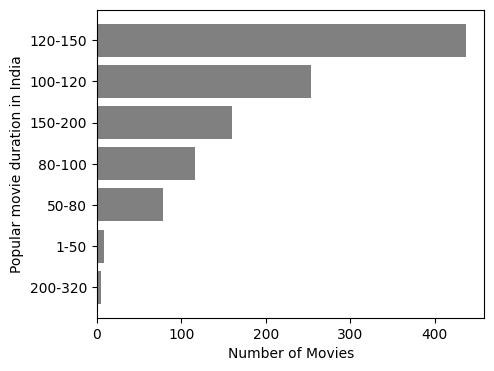

In [ ]:
Top_10_India_mov_dura=df_india_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(5,4))
plt.barh(Top_10_India_mov_dura[::-1][('duration')], Top_10_India_mov_dura[::-1]['title'],color=['grey'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular movie duration in India')
plt.show()

120-150 Minutes in the popular movie duration for indian movies

Popluar Rating

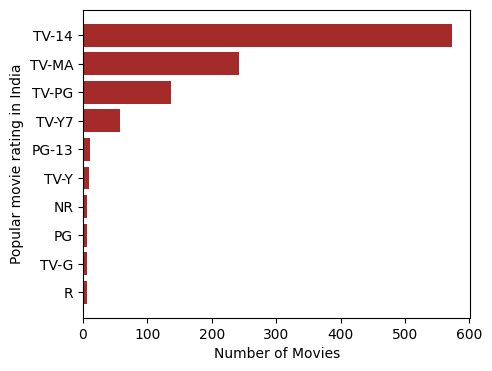

In [ ]:
Top_10_indian_mov_rating=df_india_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(5,4))
plt.barh(Top_10_indian_mov_rating[::-1][('rating')], Top_10_indian_mov_rating[::-1]['title'],color=['brown'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular movie rating in India')
plt.show()

TV-14,TV-MA,TV-PG are the most number of ratings. TV-MA Mature audiance only TV_14-Parental Guidelines signifies content with parents strongly cautioned TV-PG- suitable for all ages

Movie Release in India

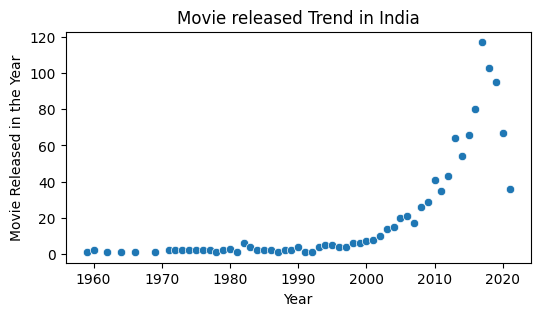

In [ ]:
#Movies release in India
df_movie_year_India=df_india_movies.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(6,3))
sns.scatterplot(data=df_movie_year_India, x='release_year', y='title')
plt.title('Movie released Trend in India')
plt.ylabel("Movie Released in the Year")
plt.xlabel("Year")
plt.show()

Though there is gap in frequency of movie release,the count of movie release is increase after 2010 and got reduced after 2019 and 2020.There is a pandamic suitution at 2020,due to this we can see a fall in count

Monthly release of movies

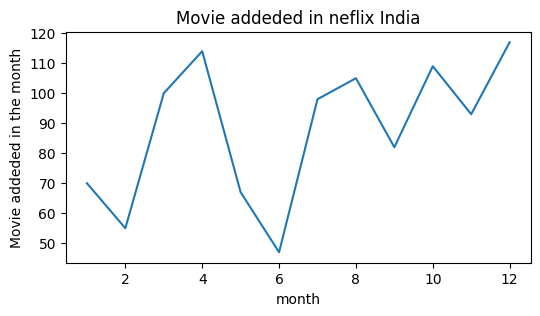

In [ ]:
df_movie_month_India=df_india_movies.groupby(['Month_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(6,3))
sns.lineplot(data=df_movie_month_India, x='Month_added', y='title')
plt.title('Movie addeded in neflix India')
plt.ylabel("Movie addeded in the month")
plt.xlabel("month")
plt.show()

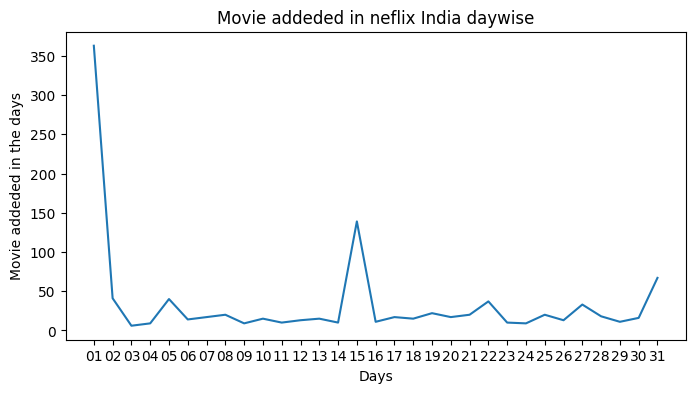

In [ ]:
df_movie_day_india=df_india_movies.groupby(['Day_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(8,4))
sns.lineplot(data=df_movie_day_india, x='Day_added', y='title')
plt.title('Movie addeded in neflix India daywise')
plt.ylabel("Movie addeded in the days")
plt.xlabel("Days")
plt.show()

From the above 2 line graphs,the best time to release movies 4th,8th,10,12th month of the year.And also especally at either each month starting or middle of the month.Seems to movies are release during summur vacation and pooja and diwali holidays.So movie release during festival occasion is best time.

# Japan TVshows Analysis - 2nd place in Tv shows

In [ ]:
df_Japan_TVshows=df_fin[df_fin['Countries']=='Japan'][df_fin[df_fin['Countries']=='Japan']['type']=='TV Show']

Popular Genre

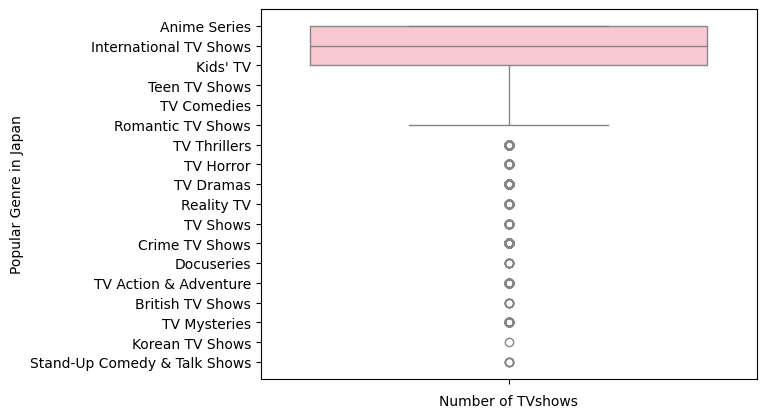

In [ ]:
sns.boxplot(y=df_Japan_TVshows["Genre"],color='pink')
plt.xlabel('Number of TVshows')
plt.ylabel('Popular Genre in Japan')
plt.show()

Popular Genre in Japan TV shows is Anime Series,Internatinal TV shows,Kids'TV

Popular Director

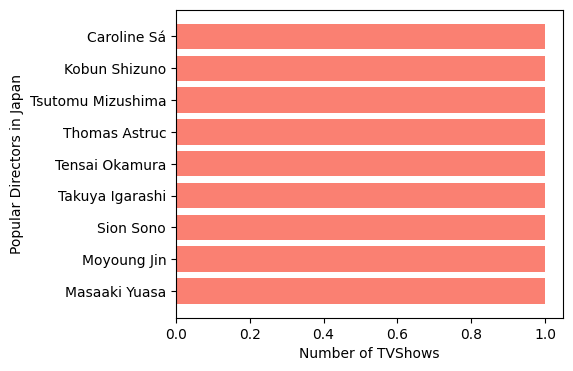

In [ ]:
Top_10_Japan_TV_directors=df_Japan_TVshows.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
Top_10_Japan_TV_directors=Top_10_Japan_TV_directors[Top_10_Japan_TV_directors['Directors']!='Unknown Director']
plt.figure(figsize=(5,4))
plt.barh(Top_10_Japan_TV_directors[::-1]['Directors'], Top_10_Japan_TV_directors[::-1]['title'],color=['salmon'])
plt.xlabel('Number of TVShows')
plt.ylabel('Popular Directors in Japan')
plt.show()

'Caroline Sá', 'Kobun Shizuno', 'Tsutomu Mizushima' are the popluar TV show directors in Japan

Popular Actor

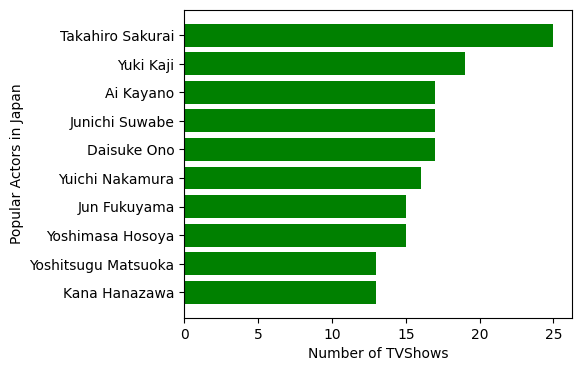

In [ ]:
Top_10_Japan_TV_actors=df_Japan_TVshows.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
Top_10_Japan_TV_actors=Top_10_Japan_TV_actors[Top_10_Japan_TV_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(5,4))
plt.barh(Top_10_Japan_TV_actors[::-1]['Actors'], Top_10_Japan_TV_actors[::-1]['title'],color=['green'])
plt.xlabel('Number of TVShows')
plt.ylabel('Popular Actors in Japan')
plt.show()

'Takahiro Sakurai', 'Yuki Kaji', 'Ai Kayano' are the popular actors in Japan

Top Actor and Director Combo

In [ ]:
df_Japan_TVshows['Actor & Director']=df_Japan_TVshows['Actors'] + ' and ' + df_Japan_TVshows['Directors']
df_Japan_TVshows_copy=df_Japan_TVshows[df_Japan_TVshows['Actors']!='Unknown Actor']
df_Japan_TVshows_copy=df_Japan_TVshows_copy[df_Japan_TVshows_copy['Directors']!='Unknown Director']

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


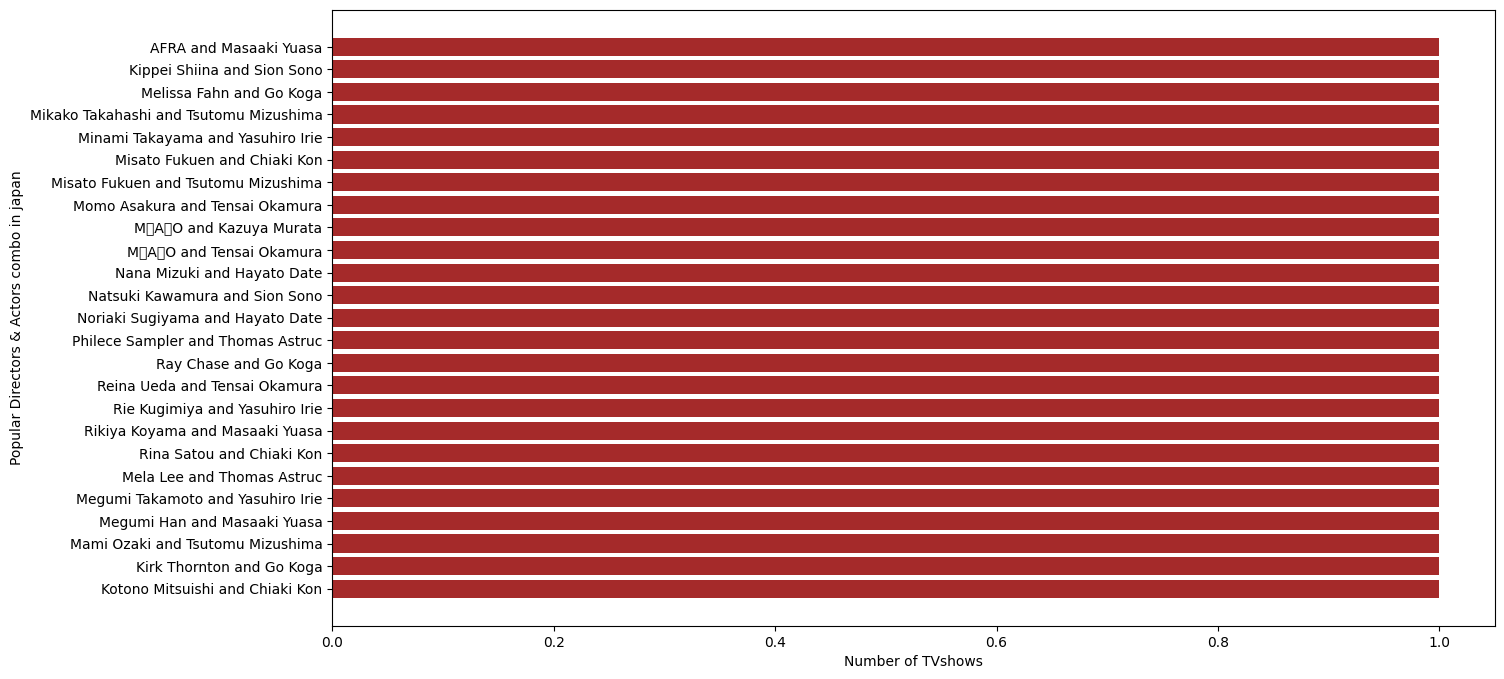

In [ ]:
Top_10_Japan_TV_actdir=df_Japan_TVshows_copy.groupby(['Actor & Director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:25]
plt.figure(figsize=(15,8))
plt.barh(Top_10_Japan_TV_actdir[::-1][('Actor & Director')], Top_10_Japan_TV_actdir[::-1]['title'],color=['brown'])
plt.xlabel('Number of TVshows')
plt.ylabel('Popular Directors & Actors combo in japan')
plt.show()

Poluar Actors & Directors Combo:
AFRA and Masaaki Yuasa', 'Kippei Shiina and Sion Sono',
       'Melissa Fahn and Go Koga',
       'Mikako Takahashi and Tsutomu Mizushima',
       'Minami Takayama and Yasuhiro Irie',
       'Misato Fukuen and Chiaki Kon',
       'Misato Fukuen and Tsutomu Mizushima',
       'Momo Asakura and Tensai Okamura', 'M・A・O and Kazuya Murata',
       'M・A・O and Tensai Okamura', 'Nana Mizuki and Hayato Date',
       'Natsuki Kawamura and Sion Sono',
       'Noriaki Sugiyama and Hayato Date',
       'Philece Sampler and Thomas Astruc', 'Ray Chase and Go Koga',
       'Reina Ueda and Tensai Okamura', 'Rie Kugimiya and Yasuhiro Irie',
       'Rikiya Koyama and Masaaki Yuasa', 'Rina Satou and Chiaki Kon',
       'Mela Lee and Thomas Astruc', 'Megumi Takamoto and Yasuhiro Irie',
       'Megumi Han and Masaaki Yuasa', 'Mami Ozaki and Tsutomu Mizushima',
       'Kirk Thornton and Go Koga', 'Kotono Mitsuishi and Chiaki Kon'

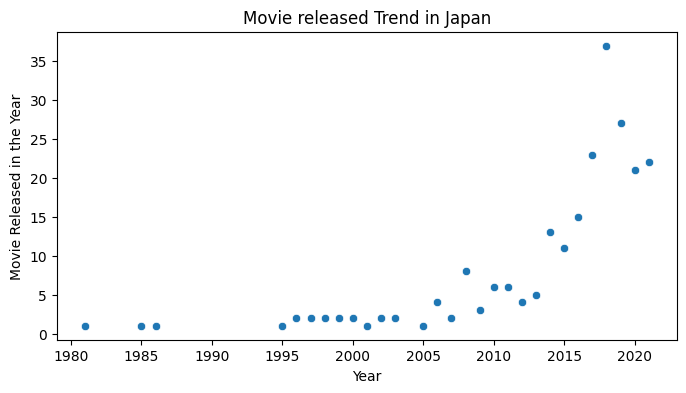

In [ ]:
#TVshows release in Japan
df_movie_year_Japan=df_Japan_TVshows.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(8,4))
sns.scatterplot(data=df_movie_year_Japan, x='release_year', y='title')
plt.title('Movie released Trend in Japan')
plt.ylabel("Movie Released in the Year")
plt.xlabel("Year")
plt.show()

Its seems the TVshows in japan are released are reduced for the past few years,they should increase in releasing more TVshows on the popular genre like Anemie,TV kids.

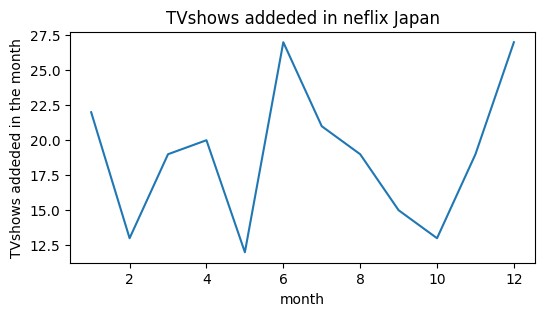

In [ ]:
df_TV_month_Japan=df_Japan_TVshows.groupby(['Month_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(6,3))
sns.lineplot(data=df_TV_month_Japan, x='Month_added', y='title')
plt.title('TVshows addeded in neflix Japan')
plt.ylabel("TVshows addeded in the month")
plt.xlabel("month")
plt.show()

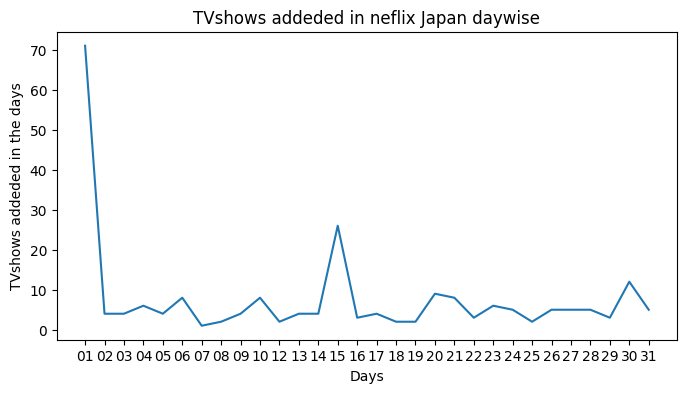

In [ ]:
df_TV_day_Japan=df_Japan_TVshows.groupby(['Day_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(8,4))
sns.lineplot(data=df_TV_day_Japan, x='Day_added', y='title')
plt.title('TVshows addeded in neflix Japan daywise')
plt.ylabel("TVshows addeded in the days")
plt.xlabel("Days")
plt.show()

From the above 2 line graphs,the best time to release TV shows is 1st,4th,6th,12 .And also especally at either each month starting or middle of the month.

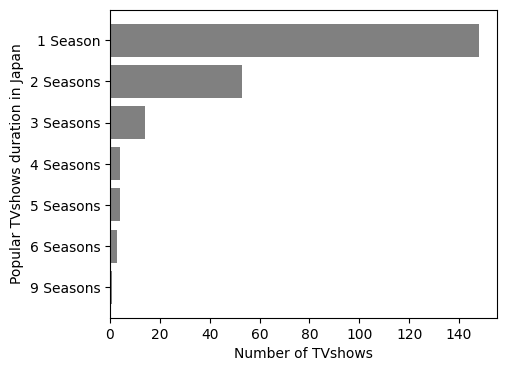

In [ ]:
Top_10_Japan_TV_dura=df_Japan_TVshows.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(5,4))
plt.barh(Top_10_Japan_TV_dura[::-1][('duration')], Top_10_Japan_TV_dura[::-1]['title'],color=['grey'])
plt.xlabel('Number of TVshows')
plt.ylabel('Popular TVshows duration in Japan')
plt.show()

The most popular TVshows are with 1 or 2 season,so netflix can produce more of short serires than the long series.

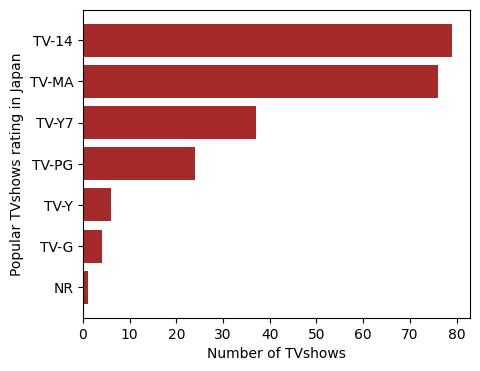

In [ ]:
Top_10_Japan_TV_rating=df_Japan_TVshows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(5,4))
plt.barh(Top_10_Japan_TV_rating[::-1][('rating')], Top_10_Japan_TV_rating[::-1]['title'],color=['brown'])
plt.xlabel('Number of TVshows')
plt.ylabel('Popular TVshows rating in Japan')
plt.show()

TV-14,TV-MA,TV-Y7 are the most number of ratings. TV-MA Mature audiance only, TV_14-Parental Guidelines signifies content with parents strongly cautioned, TV-Y7-programming is designed for chil- dren ages 7 and older.

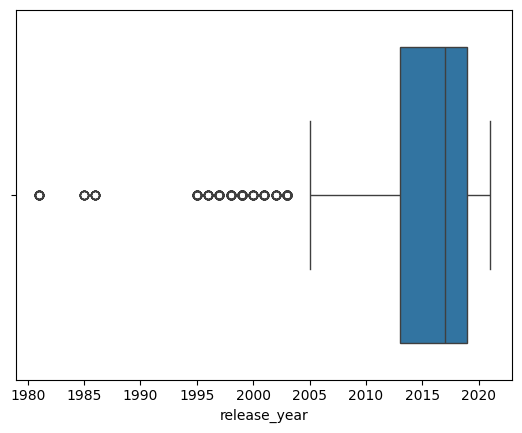

In [ ]:
sns.boxplot(x=df_Japan_TVshows["release_year"])
plt.show()

From the above graph,More than 50% of the movies are released between 2012 to 2018 and we can see some old movies are present in the outliers

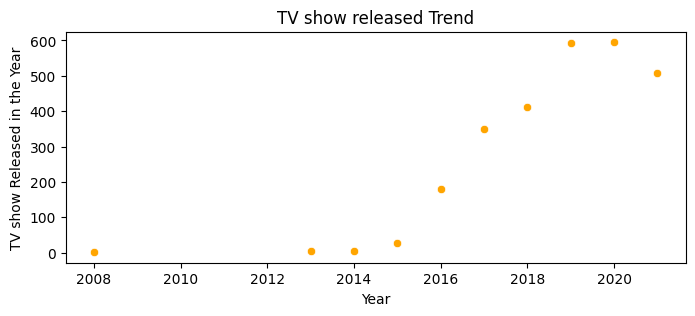

In [ ]:
#Overall TV shows added in netflix
df_TV_year=df_TVshows_all.groupby(['Year_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(8,3))
sns.scatterplot(data=df_TV_year, x='Year_added', y='title',color='orange')
plt.title('TV show released Trend')
plt.ylabel("TV show Released in the Year")
plt.xlabel("Year")
plt.show()

In [ ]:
#Overall Movies added in netflix
df_movie_year=df_movies_all.groupby(['Year_added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(8,3))
sns.scatterplot(data=df_movie_year, x='Year_added', y='title',color='m')
plt.title('Movie released Trend')
plt.ylabel("Movie Released in the Year")
plt.xlabel("Year")
plt.show()

From the end of 2008 to 2013 year there is no TVshows were produced in Netflix,but after that gradually increase.but we can see there is gradual number of movies added from 2008.Both the TV shows and movies are at the peak after 2015 till 2020

Recommended Insights:

•	Netflix is having 2/3 of the data is movies and 1/3 of the data is TV shows.From the end of 2008 to 2013 year there is no TVshows were produced in Netflix,but after that gradually increase.So they can produce more TV shows in future.
•	More than 50% of the movies are released between 2012 to 2018 and we can see some old movies are present in the outliers

•	Best time to release TV shows is in middle of the year or end of the year
•	Best time to release movies 4th,7th,12th month of the year.Best time to release movies 4th,8th,10,12th month of the year.Seems to movies are release during summur vacation,festival holidays.So movie release during festival occasion is best time.

•	Though there is gap in frequency of movie & TVshows release,the count is increase after 2010 and got reduced after 2019 and 2020.There is a pandamic suitution at 2020,due to this we can see a fall in count

•	And also especally at either each month starting or middle of the month to release the movies.
•	Here the Month added and release year are week correlation. Month added and Year_added are week negativly corelated.

•	United States,India,United Kingdom are the popular countries for Netflix Movies.
•	United States,United Kingdom,Japan are the popular countries for Netflix TV shows.


•	For Movies most of the audiance is mature ,others are need parental Guideliness.so netflix can produce movies with these rating TV-MA,TV-14,TV-PG.
•	People in USA like Restricted(R) content also,So Netflix can include R content.
•	For TVshows most of the audiance is mature ,others are need parental Guideliness and designed for chil- dren ages 7 and older.so netflix can produce movies with these rating TV-MA,TV-14,TV-PG,TV-Y7.

•	Most popular Movie duration for USA is 80-100 Minutes and for Indian viewers it is 120-150 Minutes.
•	Most popular TVshows are with 1 or 2 season,so netflix can produce more of short serires than the long series.

•	Dramas,Comedies,Documentries,International Movies are the popular Genre for movies.So netflix can produce movies on these Genre especially they can consider the popular Actors,Director and Actor & Director combo for giving further quality content.

•	Popular Genre in Japan TV shows is Anime Series,Internatinal TV shows,Kids'TV.Its seems the TVshows in japan are released are reduced for the past few years,they should increase in releasing more TVshows on the popular genre like Anemie,TV kids and consider the popular Actors,Director and Actor & Director combo.





